# Interpretability techniques for single samples from RVL-CDIP subset - LayoutLMVV3

## GITHUB

In [1]:
!git clone https://github.com/adamserag1/Interpretability-for-VRDU-models.git

Cloning into 'Interpretability-for-VRDU-models'...
remote: Enumerating objects: 1661, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 1661 (delta 114), reused 118 (delta 58), pack-reused 1472 (from 1)
Receiving objects: 100% (1661/1661), 26.61 MiB | 27.63 MiB/s, done.
Resolving deltas: 100% (1053/1053), done.


In [44]:
!git pull https://github.com/adamserag1/Interpretability-for-VRDU-models.git

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0 (from 0)
Unpacking objects: 100% (4/4), 523 bytes | 523.00 KiB/s, done.
From https://github.com/adamserag1/Interpretability-for-VRDU-models
 * branch            HEAD       -> FETCH_HEAD
Updating 8e0bb6a..8e699cb
Fast-forward
 Eval/eval_suite_updated.py | 37 ++++++++++++++++++++++---------------
 1 file changed, 22 insertions(+), 15 deletions(-)


In [3]:
%cd /content/Interpretability-for-VRDU-models

/content/Interpretability-for-VRDU-models


In [4]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 131.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
!pip install -U datasets

## Libraries

In [45]:
#code
from datasets import load_from_disk
from transformers import LayoutLMv3ForSequenceClassification, AutoProcessor, BrosModel, AutoTokenizer, BrosPreTrainedModel, AutoConfig
import sys
import importlib
def reload_modules():
    for module in list(sys.modules.keys()):
        if module.startswith('vrdu_utils') or module.startswith('Classification_Explain') or module.startswith('lime') or module.startswith('Eval'):
            print(f"Reloading module: {module}")
            importlib.reload(sys.modules[module])

reload_modules()

from vrdu_utils.encoders import *
from Classification_Explain.lime import *
from vrdu_utils.utils import *
import torch
from Eval.eval_suite import *
from Eval.eval_suite_updated import *
# from Eval.fidelity import *
from Classification_Explain.shap import *
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import warnings
from transformers import logging as hf_logging

warnings.filterwarnings(
    "ignore",
    category=FutureWarning,
    module="transformers.modeling_utils",   # the module that emits the msg
)
hf_logging.set_verbosity_error()


Reloading module: vrdu_utils.module_types
Reloading module: vrdu_utils.utils
Reloading module: vrdu_utils.encoders
Reloading module: vrdu_utils
Reloading module: lime
Reloading module: lime.discretize
Reloading module: lime.exceptions
Reloading module: lime.explanation
Reloading module: lime.lime_base
Reloading module: lime.lime_tabular
Reloading module: lime.wrappers
Reloading module: lime.utils
Reloading module: lime.utils.generic_utils
Reloading module: lime.wrappers.scikit_image
Reloading module: lime.lime_image
Reloading module: Classification_Explain.lime
Reloading module: Classification_Explain.shap
Reloading module: Classification_Explain
Reloading module: Eval.fidelity
Reloading module: Eval.eval_suite
Reloading module: Eval
Reloading module: Eval.eval_suite_updated


## Data + Model Setup

In [7]:
from google.colab import drive
drive.mount("/content/drive")
!cp -r /content/drive/MyDrive/THESIS/rvl_cdip_financial_subset /content

Mounted at /content/drive


In [8]:
rvl = load_from_disk('/content/rvl_cdip_financial_subset')
dataset_split = rvl.train_test_split(test_size=0.2, seed=42)
val = dataset_split["test"]
val_ds = DocSampleDataset(val)

# Extract samples 'agree' (LLMV3 + BROS classify correct) and 'CLASH' (LLMV3 classify wrong, BROS classify correct)

AGREE = val_ds[846] # (contents, idx)
CLASH = val_ds[282] # (contents, idx) #282

In [ ]:
AGREE[0].label

4

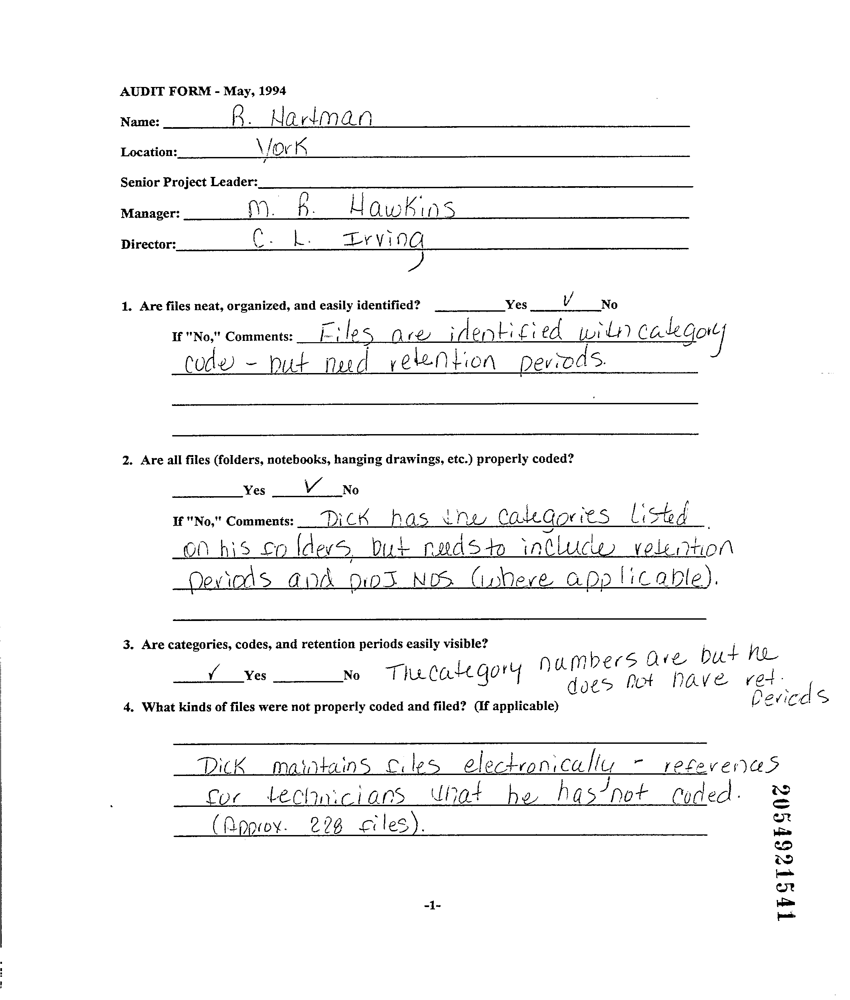

In [21]:
CLASH[0].image

### BROSforDocumentClassifcation classifier head


In [9]:
from torch import nn
class BrosForDocumentClassification(BrosPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels

        self.bros = BrosModel(config)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)

        self.init_weights()

    def forward(
        self,
        input_ids=None,
        bbox=None,
        attention_mask=None,
        token_type_ids=None,
        labels=None,
        **kwargs
    ):
        outputs = self.bros(
            input_ids=input_ids,
            bbox=bbox,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
        )

        # Use the [CLS] token's representation (first token)
        cls_output = outputs.last_hidden_state[:, 0, :]  # shape: (batch_size, hidden_size)

        cls_output = self.dropout(cls_output)
        logits = self.classifier(cls_output)

        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

        return {
            "loss": loss,
            "logits": logits,
        }

### Model config

In [10]:
LLMV3 = LayoutLMv3ForSequenceClassification.from_pretrained("adamadam111/layoutlmv3-docclass-finetuned-frz",
                                                            num_labels=5,
                                                            id2label={0: "form", 1: "invoice", 2: "budget", 3: "file folder", 4: "questionnaire"},
                                                            label2id={"form": 0, "invoice": 1, "budget": 2, "file folder": 3, "questionnaire": 4})
LLMV3_proc = AutoProcessor.from_pretrained("adamadam111/layoutlmv3-docclass-finetuned-frz", apply_ocr=False)

LLMV3.to(device)

bros_config = AutoConfig.from_pretrained(
    "adamadam111/bros-docclass-finetuned-frz",
    num_labels=5,
    id2label={0: "form", 1: "invoice", 2: "budget", 3: "file folder", 4: "questionnaire"},
    label2id={"form": 0, "invoice": 1, "budget": 2, "file folder": 3, "questionnaire": 4}
)

BROS = BrosForDocumentClassification.from_pretrained(
    "adamadam111/bros-docclass-finetuned-frz",
    config=bros_config
)
BROS_t = AutoTokenizer.from_pretrained("adamadam111/bros-docclass-finetuned-frz",do_lower_case=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/504M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/966 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

## Interpreting the 'CLASH' sample

In [11]:
LLMV3_encode = make_layoutlmv3_encoder(LLMV3_proc)
BROS_encode = make_bros_encoder(BROS_t)

pred_fn_llmv3 = FidelityEvaluator(LLMV3, LLMV3_encode, mask_token=LLMV3_proc.tokenizer.mask_token)._get_prediction_function(4)
pred_fn_llmv3 = FidelityEvaluator(BROS, BROS_encode, mask_token=BROS_t.mask_token)._get_prediction_function(0)


### Text Modality


In [ ]:
# for idx, sample in enumerate(val_ds):
#   pred_bros = torch.argmax(BROS(**BROS_encode([sample[0]],device))['logits'], dim=1).item()
#   pred_llmv3 = torch.argmax(LLMV3(**LLMV3_encode([sample[0]], device))['logits'], dim=1).item()
#   if pred_bros != pred_llmv3:
#     print(f'Sample idx: {idx}, prediction BROS: {pred_bros}, prediction LLMV3: {pred_llmv3}, gt: {sample[0].label}')

NameError: name 'BROS_encode' is not defined

In [ ]:
print(CLASH[0].words)

['AUDIT', 'FORM', '-', 'May,', '1994', 'Name:', 'R.', 'Nanmaa', 'Location:', 'Mock', 'Senior', 'Project', 'Leader:,', 'Manager:', 'mf.', 'Nawkins', 'Director:', 'C.', 'bk.', 'atrving', '1.', 'Are', 'files', 'neat,', 'organized,', 'and', 'easily', 'identified?', 'xes__V__No', '16°\'No,"', 'Comments:', 'Ei', 'bigied', 'with', 'categon', 'ou)', 'cody', '=', 'put', 'peed', 'teleAtion', 'periods', '2.', 'Are', 'll', 'ies', '(folders,', 'notebooks,', 'hanging', 'drawings', 'etc.)', 'properly', 'coded?', 'yes__V_No', 'If"No,"', 'Comments:', 'DICK', 'has', 'inv', 'ColeaaritS', 'listd', '.', 'oO', 'iS', 'cp', '(devs', 'Dut', 'naddsto', 'intlucer', 'veleohon', 'Qeviods', 'and', 'pot', 'NOS', 'Cnheve', 'app', 'licanle).', '3.', 'Are', 'categories,', 'codes,', 'and', 'retention', 'periods', 'easily', 'visible?', '+e', 'Numbers', 'are', 'Du', 'Yves', 'ne', 'Thecategory', 'ON', 'ee', 'Have', 'ved', '4.', 'What', 'kinds', 'of', 'files', 'were', 'not', 'properly', 'coded', 'and', 'filed?', '(If', 'app

In [ ]:
!git pull https://github.com/adamserag1/Interpretability-for-VRDU-models.git

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0 (from 0)
Unpacking objects: 100% (4/4), 586 bytes | 586.00 KiB/s, done.
From https://github.com/adamserag1/Interpretability-for-VRDU-models
 * branch            HEAD       -> FETCH_HEAD
Updating 1255bcc..01b3e7f
Fast-forward
 Eval/fidelity.py | 34 +++++++++++++++++++++++++---------
 1 file changed, 25 insertions(+), 9 deletions(-)


In [ ]:
from Classification_Explain.lime import *
from Classification_Explain.shap import *

In [11]:

text_explainers = {
    'BROS lime' : LimeTextExplainer(BROS, BROS_encode, mask_token=BROS_t.mask_token, kernel_width_factor = 0.75, labels=[4,0]),
    'LLMV3 lime' : LimeTextExplainer(LLMV3, LLMV3_encode, mask_token = LLMV3_proc.tokenizer.mask_token, kernel_width_factor = 0.75, labels = [4,0]),
    'BROS shap' : SHAPTextExplainer(BROS, BROS_encode, BROS_t, mask_token=BROS_t.mask_token, device=device),
    'LLMV3 shap' : SHAPTextExplainer(LLMV3, LLMV3_encode, LLMV3_proc.tokenizer,mask_token=LLMV3_proc.tokenizer.mask_token, device=device)
}

In [12]:
# RUN FOR
shap_text_explainations = {key : explainer.explain(CLASH[0], nsamples = 4000) for key, explainer in text_explainers.items() if 'shap' in key}
lime_text_explainations = {key : explainer.explain(CLASH[0], num_samples = 4000) for key, explainer in text_explainers.items() if 'lime' in key}

PermutationExplainer explainer: 2it [01:49, 109.00s/it]              
PermutationExplainer explainer: 2it [01:55, 115.95s/it]              


Begging EXPLAINER
Begging EXPLAIN_INSTANCE
MADE PREDICT


[LIME] - Text: 100%|██████████| 250/250 [01:50<00:00,  2.27it/s]


Begging EXPLAINER
Begging EXPLAIN_INSTANCE
MADE PREDICT


[LIME] - Text: 100%|██████████| 250/250 [02:04<00:00,  2.01it/s]


{'BROS shap': .values =
 array([[[-6.67649412e-02,  2.62334382e-01,  2.98334249e-01,
           3.47434998e-02,  1.68432613e-02],
         [ 1.12306073e-01, -2.82773834e-01, -1.67215204e-01,
          -1.40409454e-01, -4.90819681e-01],
         [ 4.41616309e-03, -1.27191886e-02, -1.22387250e-02,
          -1.17009640e-02, -2.04274019e-02],
         [ 8.55637647e-02, -1.51800639e-01, -6.33977175e-02,
          -4.73692338e-02, -1.75737329e-01],
         [ 1.42355078e-01, -2.69945980e-01, -1.69099204e-01,
          -1.33864657e-01, -3.94049887e-01],
         [ 7.02610888e-02, -7.22531716e-02, -5.11738062e-02,
          -6.48833116e-03, -6.88374162e-02],
         [ 1.08871024e-02, -3.58408496e-02, -3.31236045e-02,
           1.69734955e-03, -5.48906247e-02],
         [ 3.76523463e-02, -5.06938318e-02, -3.99397373e-02,
          -1.74480597e-02,  2.62919068e-03],
         [ 5.20103201e-02, -6.99209998e-02, -4.54799175e-02,
          -5.58008273e-02, -5.02244993e-01],
         [-9.69972874e

In [119]:
bros_pred = text_explainers['BROS lime']._predict([CLASH[0]])
llmv3_pred = text_explainers['LLMV3 lime']._predict([CLASH[0]]).flatten()
print(llmv3_pred.argmax())
print(bros_pred, llmv3_pred)
CLASH[0].label

4
[[9.7115314e-01 2.4415171e-03 1.0365181e-03 9.2469843e-04 2.4444094e-02]] [6.8335067e-03 1.2040725e-03 8.8737922e-04 3.0645798e-04 9.9076861e-01]


0

Removed top 5 words
[COMP] original probability: 0.9907686114311218, perturbed_probability: 0.9947274327278137
Removed top 5 words
[COMP] original probability: 0.9907686114311218, perturbed_probability: 0.9513720870018005
Kept top 5 text tokens
[SUF] original probability: 0.9907686114311218, perturbed_probability: 0.6865787506103516
Kept top 5 text tokens
[SUF] original probability: 0.9907686114311218, perturbed_probability: 0.9954131245613098


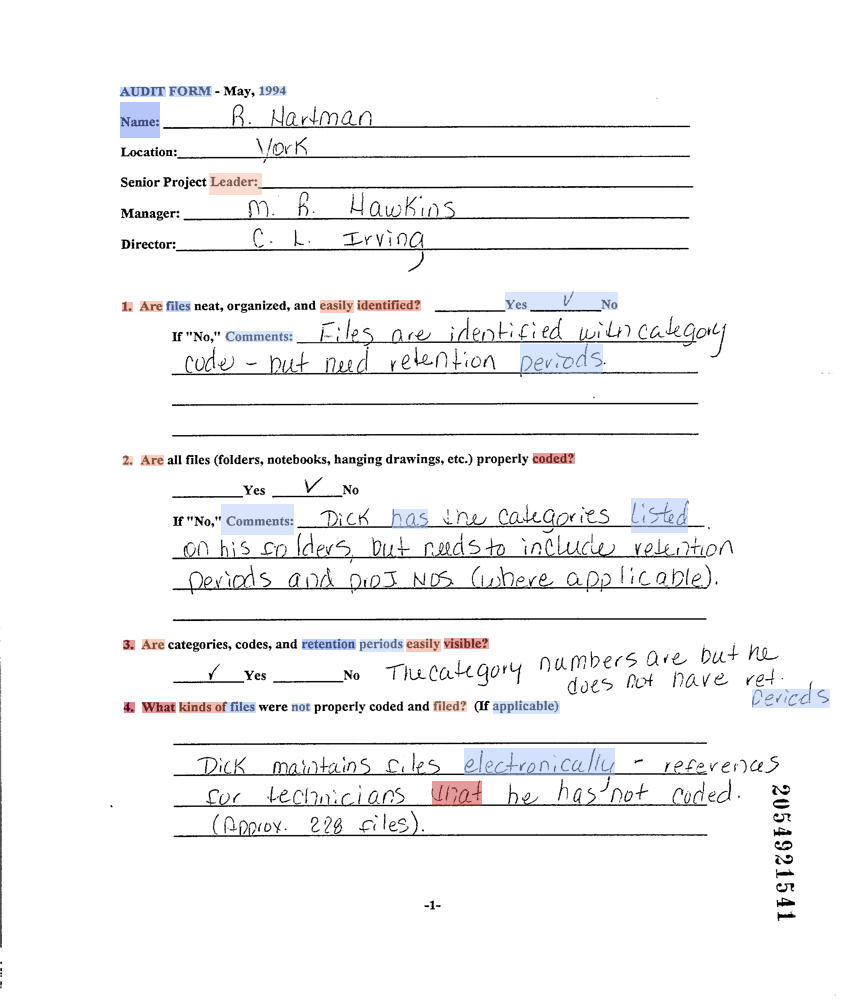

In [14]:
# Pertaining to label 4 (correct, Questionnaire) (idx 0 shap)
text_explanations_hms = {}
text_explanations_weights = {}
for key, explanation in shap_text_explainations.items():
  weights = {tok : float(val) for tok, val in zip(CLASH[0].words, shap_text_explainations[key].values[:,:,4].flatten())}
  text_explanations_weights.update({key : weights})
  text_explanations_hms.update({key : draw_lime_token_heatmap(image = CLASH[0].image, words = CLASH[0].words, boxes = CLASH[0].bboxes, weights=weights, alpha=0.5) })

for key, explanation in lime_text_explainations.items():
  weights = dict(lime_text_explainations[key].as_list(label=4))
  clean_weights = {key.replace('=1', ''): value for key, value in weights.items()}
  text_explanations_weights.update({key : clean_weights})
  text_explanations_hms.update({key : draw_lime_token_heatmap(image = CLASH[0].image, words = CLASH[0].words, boxes = CLASH[0].bboxes, weights=clean_weights, alpha=0.5) })

# LLMV3 Fidelity
pred_fn_llmv3_s = FidelityEvaluator(LLMV3, LLMV3_encode, mask_token=LLMV3_proc.tokenizer.mask_token)._get_prediction_function(4)
pred_fn_llmv3_l = FidelityEvaluator(LLMV3, LLMV3_encode, mask_token='|~|')._get_prediction_function(4)
comp_s = calculate_comprehensiveness(pred_fn_llmv3_s, CLASH[0], text_explanations_weights['LLMV3 shap'], mask_token='|~|',  top_k=5)
comp_l = calculate_comprehensiveness(pred_fn_llmv3_l, CLASH[0], text_explanations_weights['LLMV3 lime'], mask_token=LLMV3_proc.tokenizer.mask_token,  top_k=5)
suf_s = calculate_sufficiency(pred_fn_llmv3_s, CLASH[0], text_explanations_weights['LLMV3 shap'], mask_token='|~|',  top_k=5)
suf_l = calculate_sufficiency(pred_fn_llmv3_l, CLASH[0], text_explanations_weights['LLMV3 lime'], mask_token=LLMV3_proc.tokenizer.mask_token,  top_k=5)

# display_image_grid([text_explanations_hms['LLMV3 lime'], text_explanations_hms['LLMV3 shap']],
#                    [f'LLMV3 - Lime w.r.t text\nComprehensiveness = {comp_l:.3g}, Sufficiency = {suf_l:.3g}', f'LLMV3 - SHAP w.r.t text\nComprehensiveness = {comp_s:.3g}, Sufficiency = {suf_s:.3g}'],
#                     (1,2),
#                    main_title='Layout LMV3 Correct Prediction w.r.t Text\n "Questionnaire"')

# text_explanations_hms['LLMV3 shap']
text_explanations_hms['LLMV3 lime']

Removed top 5 words
[COMP] original probability: 0.9711531400680542, perturbed_probability: 0.9913150668144226
Removed top 5 words
[COMP] original probability: 0.9711531400680542, perturbed_probability: 0.9319615960121155
Kept top 5 text tokens
[SUF] original probability: 0.9711531400680542, perturbed_probability: 0.7972629070281982
Kept top 5 text tokens
[SUF] original probability: 0.9711531400680542, perturbed_probability: 0.20650088787078857


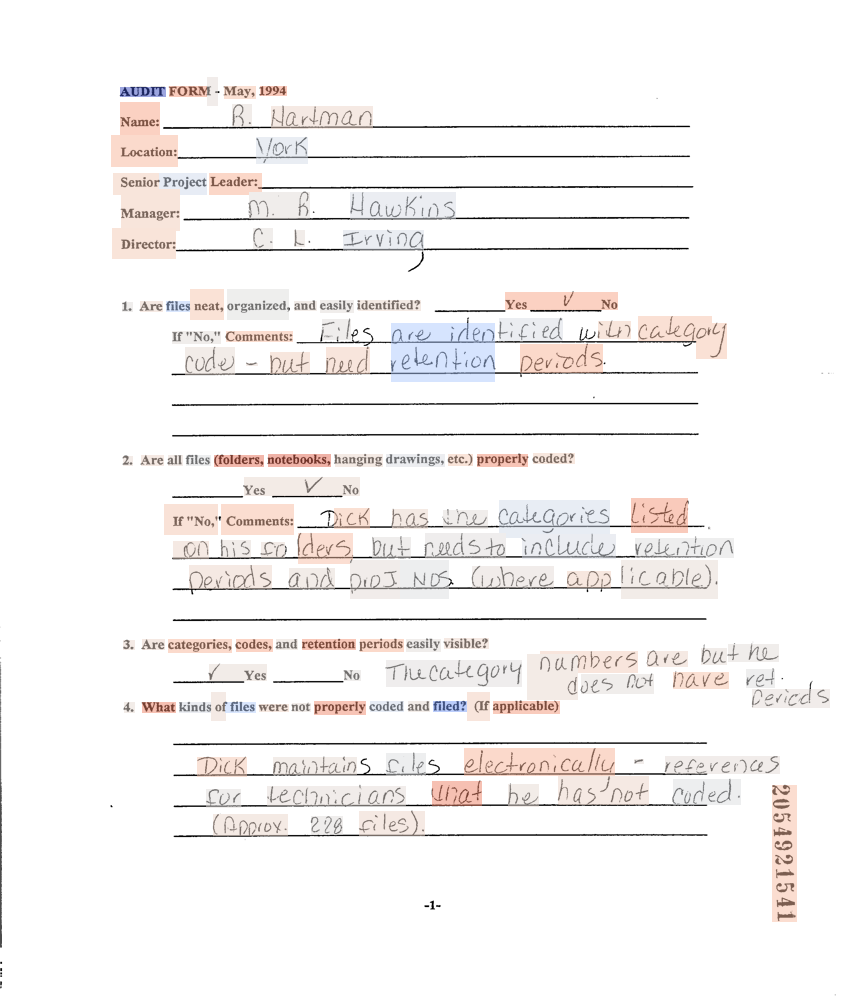

In [21]:
text_explanations_hms = {}
text_explanations_weights = {}
for key, explanation in shap_text_explainations.items():
  weights = {tok : float(val) for tok, val in zip(CLASH[0].words, shap_text_explainations[key].values[:,:,0].flatten())}
  text_explanations_weights.update({key : weights})
  text_explanations_hms.update({key : draw_lime_token_heatmap(image = CLASH[0].image, words = CLASH[0].words, boxes = CLASH[0].bboxes, weights=weights, alpha=0.5) })

for key, explanation in lime_text_explainations.items():
  weights = dict(lime_text_explainations[key].as_list(label=0))
  clean_weights = {key.replace('=1', ''): value for key, value in weights.items()}
  text_explanations_weights.update({key : clean_weights})
  text_explanations_hms.update({key : draw_lime_token_heatmap(image = CLASH[0].image, words = CLASH[0].words, boxes = CLASH[0].bboxes, weights=clean_weights, alpha=0.5) })

# LLMV3 Fidelity
pred_fn_bros_s = FidelityEvaluator(BROS, BROS_encode, mask_token=BROS_t.mask_token)._get_prediction_function(0)
pred_fn_bros_l = FidelityEvaluator(BROS, BROS_encode, mask_token='|~|')._get_prediction_function(0)
comp_s = calculate_comprehensiveness(pred_fn_bros_s, CLASH[0], text_explanations_weights['BROS shap'], mask_token='|~|',  top_k=5)
comp_l = calculate_comprehensiveness(pred_fn_bros_l, CLASH[0], text_explanations_weights['BROS lime'], mask_token=BROS_t.mask_token, top_k=5)
suf_s = calculate_sufficiency(pred_fn_bros_s, CLASH[0], text_explanations_weights['BROS shap'], mask_token='|~|', top_k=5)
suf_l = calculate_sufficiency(pred_fn_bros_l, CLASH[0], text_explanations_weights['BROS lime'], mask_token=BROS_t.mask_token, top_k=5)

# display_image_grid([text_explanations_hms['BROS lime'], text_explanations_hms['BROS shap']],
#                    [f'BROS - Lime\nComprehensiveness = {comp_l:.3g}, Sufficiency = {suf_l:.3g}', f'BROS - SHAP\nComprehensiveness = {comp_s:.3g}, Sufficiency = {suf_s:.3g}'],
#                     (1,2),
#                    main_title='BROS inorrect Prediction w.r.t Text\n "Form"')

# text_explanations_hms['BROS lime']
text_explanations_hms['BROS shap']

In [ ]:
text_explanations_hms = {}
text_explanations_weights = {}
for key, explanation in shap_text_explainations.items():
  weights = {tok : float(val) for tok, val in zip(CLASH[0].words, shap_text_explainations[key].values[:, 0])}
  text_explanations_weights.update({key : weights})
  text_explanations_hms.update({key : draw_lime_token_heatmap(image = CLASH[0].image, words = CLASH[0].words, boxes = CLASH[0].bboxes, weights=weights, alpha=0.5) })

for key, explanation in lime_text_explainations.items():
  weights = dict(lime_text_explainations[key].as_list(label=0))
  clean_weights = {key.replace('=1', ''): value for key, value in weights.items()}
  text_explanations_weights.update({key : clean_weights})
  text_explanations_hms.update({key : draw_lime_token_heatmap(image = CLASH[0].image, words = CLASH[0].words, boxes = CLASH[0].bboxes, weights=clean_weights, alpha=0.5) })

In [ ]:
## Pertaining to label 0 (incorrect, Form)

In [28]:
 print(shap_text_explainations['BROS shap'].values[:,:,4].flatten())

[-0.02320037 -0.44888191 -0.02827371 -0.20174369 -0.34558887 -0.14945946
 -0.03653385 -0.04374196 -0.43915249  0.04528757  0.01861645 -0.03265147
  0.11481645  0.07308837 -0.07270111  0.0120756  -0.18448348 -0.00276541
 -0.06131001  0.0549385  -0.01051479  0.01389676  0.06234008  0.01659803
  0.12868169 -0.03126767  0.17862432  0.23597297 -0.27596935 -0.08434799
 -0.26855036 -0.0702152   0.08305906 -0.01708766 -0.06001284  0.02926317
 -0.09435444  0.00772377  0.05426254 -0.10826571  0.03541983  0.05495919
 -0.01327029 -0.00535895  0.00168312 -0.02360869 -0.10253881 -0.12269858
 -0.06810145 -0.1728949  -0.02421786 -0.26629212  0.55197159 -0.06341662
 -0.09655796 -0.06198936  0.06113763  0.03568755 -0.04429815 -0.00948559
  0.01612401  0.01871874 -0.03058656 -0.00279465 -0.04088358 -0.04909889
 -0.03749235 -0.06222254  0.06949681  0.0081276  -0.03330033 -0.0190984
 -0.01542477 -0.07920694 -0.06347755 -0.0570384   0.02337433 -0.01918304
  0.02303141  0.07249296 -0.04279718 -0.00400474 -0.

In [74]:
print(lime_text_explainations['BROS lime'])

In [104]:
print( [dict(lime_text_explainations['BROS lime'].as_list(label=0))])

[{'1994=1': 0.0116959282595125, 'Comments:=1': 0.007971784457042993, 'filed?=1': -0.009757129170178213, 'applicable)=1': 0.008894990994341151, 'FORM=1': 0.008614136303709566, 'retention=1': 0.00826168559876668, 'Manager:=1': 0.00824104658806923, 'coded?=1': -0.007089140724483731, 'coded=1': -0.006713672809150192, 'Leader:,=1': 0.006643153037651305, 'May,=1': 0.006489726949519265, 'Location:=1': 0.006112825322192659, 'xes__V__No=1': 0.006071923965176823, 'yes__V_No=1': 0.005644660866762341, 'hanging=1': -0.005568071142602981, '(devs=1': 0.005087742921009011, 'Director:=1': 0.0046700676782581675, 'properly=1': 0.0035598403970619297, 'categories,=1': 0.004327990100806845, 'listd=1': 0.0040662796782329706, 'Name:=1': 0.003970031068945376, 'peed=1': 0.003937009872792956, 'Senior=1': 0.003934474080523677, 'codes,=1': 0.003900914701446932, 'technicians=1': 0.003643942857133231, 'files=1': -0.0028260097639965505, 'periods=1': 0.00284272870473202}]


In [112]:
CLASH[0].label

0

In [19]:
# FIDELTI
from Eval.eval_suite_updated import evaluate_sample as eval
# from Eval.eval_suite_updated import calculate_sufficiency as calculate_sufficiency
def predict_fn_bros(sample):
    enc = BROS_encode([sample], device)
    pred = BROS(**enc)
    logits = pred['logits']
    probs  = torch.softmax(logits, -1)[0]
    return probs[0].item()

@torch.no_grad()
def predict_fn_llmv3(sample):
    enc = LLMV3_encode([sample], device)
    logits =  LLMV3(**enc).logits
    probs  = torch.softmax(logits, -1)[0]
    return probs[4].item()


# class_ids_dict = {
#     "BROS lime"  : 0,   # probability of class-0 for BROS
#     "LLMV3 lime" : 4,   # probability of class-4 for LayoutLMv3
#     "BROS shap"  : 0,
#     "LLMV3 shap" : 4,
# }

# models_dict = {
#     'BROS lime' : BROS,
#     'LLMV3 lime' : LLMV3,
#     'BROS shap' : BROS,
#     'LLMV3 shap' : LLMV3
# }

# encoders_dict = {
#     'BROS lime' : BROS_encode,
#     'LLMV3 lime' : LLMV3_encode,
#     'BROS shap' : BROS_encode,
#     'LLMV3 shap' : LLMV3_encode
# }

# mask_tokens_dict = {
#     'BROS lime' : BROS_t.mask_token,
#     'LLMV3 lime' : LLMV3_proc.tokenizer.mask_token,
#     'BROS shap' : BROS_t.mask_token,
#     'LLMV3 shap' : LLMV3_proc.tokenizer.mask_token
# }
# text_explanations_dict = {
#     'BROS lime' : [dict(lime_text_explainations['BROS lime'].as_list(label=0))],
#     'LLMV3 lime' : [dict(lime_text_explainations['LLMV3 lime'].as_list(label=4))],
#     'BROS shap' : [{tok : float(val) for tok, val in zip(CLASH[0].words, shap_text_explainations['BROS shap'].values[:,:,0].flatten())}],
#     'LLMV3 shap' : [{tok : float(val) for tok, val in zip(CLASH[0].words, shap_text_explainations['LLMV3 shap'].values[:,:,4].flatten())}]
# }

# aopc = compute_aopc_curves([CLASH[0]], text_explanations_dict, modality="text", models_dict=models_dict, encoders_dict=encoders_dict, mask_tokens_dict=mask_tokens_dict, class_ids_dict = class_ids_dict, max_k=50)
# plot_aopc_curves(aopc, modality="text")
# text_explanations_dict = shap_text_explainations
# print(lime_text_explainations)
# text_explanations_dict.update({k : d.as_list(label=0) for k, d in lime_text_explainations.items()})
# print(text_explanations_dict)
# print(len(shap_text_explainations))
shap_text_fid = {}
lime_text_fid = {}
for key,exp in shap_text_explainations.items():
  if 'LLMV3' in key:
    weights = {tok : float(val) for tok, val in zip(CLASH[0].words, exp.values[:,:,4].flatten())}
    shap_text_fid.update({key : eval(CLASH[0], weights, 'text', LLMV3, LLMV3_encode, top_k=5, device=device, mask_token=LLMV3_proc.tokenizer.mask_token, target_class_id=4)})

  if 'BROS' in key:
    weights = {tok : float(val) for tok, val in zip(CLASH[0].words, exp.values[:,:,0].flatten())}
    shap_text_fid.update({key : eval(CLASH[0], weights, 'text', BROS, BROS_encode, top_k=5, device=device, mask_token=BROS_t.mask_token,  target_class_id=0)})


for key,exp in lime_text_explainations.items():
  if 'LLMV3' in key:
    weights = dict(exp.as_list(label=0))
    clean_weights = {key.replace('=1', ''): value for key, value in weights.items()}
    shap_text_fid.update({key : eval(CLASH[0], clean_weights, 'text', LLMV3, LLMV3_encode, top_k=5, device=device, mask_token=LLMV3_proc.tokenizer.mask_token,  target_class_id=4)})

  if 'BROS' in key:
    weights = dict(exp.as_list(label=0))
    clean_weights = {key.replace('=1', ''): value for key, value in weights.items()}
    shap_text_fid.update({key : eval(CLASH[0], clean_weights, 'text', BROS, BROS_encode, top_k=5, device=device, mask_token=BROS_t.mask_token,  target_class_id=0)})

print(lime_text_fid)
print(shap_text_fid)

{}
{'BROS shap': {'comprehensiveness': 0.007854282855987549, 'sufficiency': 0.6269776523113251, 'original_prob': 0.9711531400680542}, 'LLMV3 shap': {'comprehensiveness': -0.0016361474990844727, 'sufficiency': -0.0029863715171813965, 'original_prob': 0.9907686114311218}, 'BROS lime': {'comprehensiveness': 0.03919154405593872, 'sufficiency': 0.7646522521972656, 'original_prob': 0.9711531400680542}, 'LLMV3 lime': {'comprehensiveness': -0.004298985004425049, 'sufficiency': 0.8860860168933868, 'original_prob': 0.9907686114311218}}


## Layout

In [20]:
layout_explainers = {
    'BROS lime' : LimeLayoutExplainer(BROS, BROS_encode, mask_token=BROS_t.mask_token, kernel_width_factor = 0.75, labels=[4,0]),
    'LLMV3 lime' : LimeLayoutExplainer(LLMV3, LLMV3_encode, mask_token = LLMV3_proc.tokenizer.mask_token, kernel_width_factor = 0.75, labels = [4,0]),
    'BROS shap' : SHAPLayoutExplainer(BROS, BROS_encode, device=device),
    'LLMV3 shap' : SHAPLayoutExplainer(LLMV3, LLMV3_encode, device=device)
}

In [21]:
shap_layout_explainations = {key : explainer.explain(CLASH[0], nsamples = 4000) for key, explainer in layout_explainers.items() if 'shap' in key}
lime_layout_explainations = {key : explainer.explain(CLASH[0], num_samples = 4000) for key, explainer in layout_explainers.items() if 'lime' in key}

PermutationExplainer explainer: 2it [01:44, 104.83s/it]              
PermutationExplainer explainer: 2it [01:56, 116.59s/it]              


Begging EXPLAINER
Begging EXPLAIN_INSTANCE


[LIME] - Text: 100%|██████████| 250/250 [01:49<00:00,  2.29it/s]


Begging EXPLAINER
Begging EXPLAIN_INSTANCE


[LIME] - Text: 100%|██████████| 250/250 [02:04<00:00,  2.01it/s]


Removed top 10 words
[COMP] original probability: 0.9907686114311218, perturbed_probability: 0.993809163570404
Removed top 10 words
[COMP] original probability: 0.9907686114311218, perturbed_probability: 0.993809163570404
Kept top 5 layout tokens
[SUF] original probability: 0.9907686114311218, perturbed_probability: 0.93351149559021
Kept top 5 layout tokens
[SUF] original probability: 0.9907686114311218, perturbed_probability: 0.93351149559021


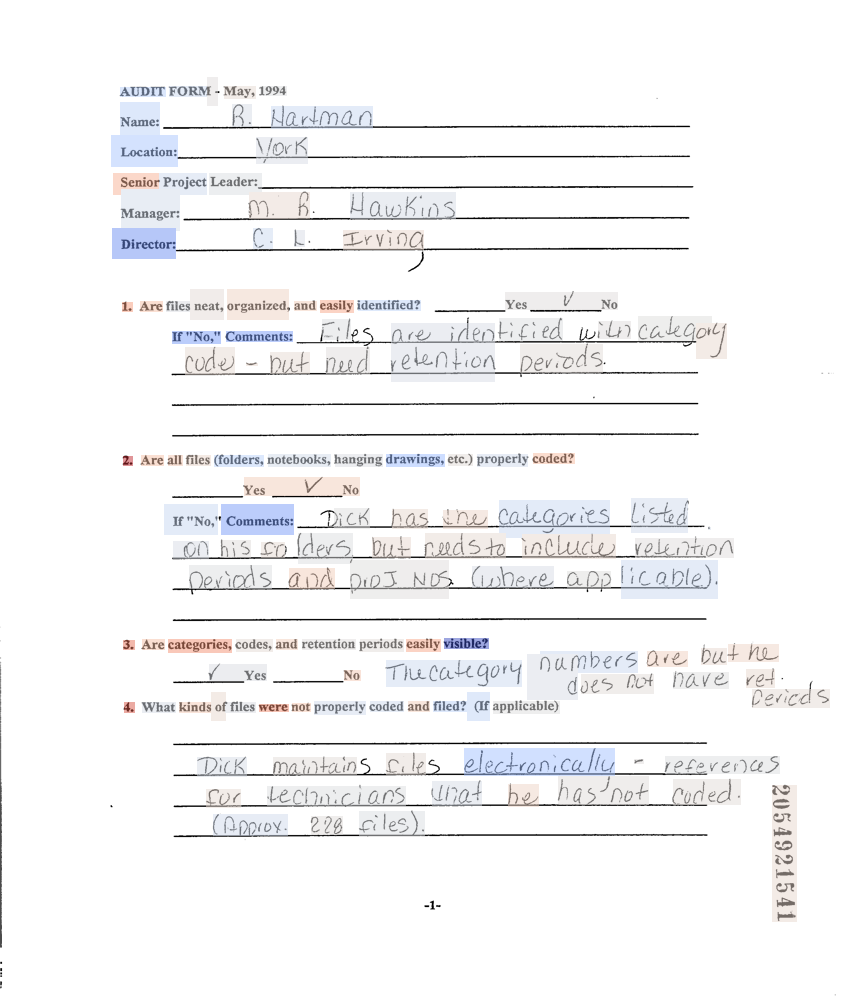

In [26]:
# Pertaining to label 4 (correct, Questionnaire) (idx 0 shap)
layout_explanations_hms = {}
layout_explanations_weights = {}
for key, explanation in shap_layout_explainations.items():
  weights = {tok : float(val) for tok, val in zip(CLASH[0].words, shap_layout_explainations[key].values[:,:,4].flatten())}
  layout_explanations_weights.update({key : weights})
  layout_explanations_hms.update({key : draw_lime_token_heatmap(image = CLASH[0].image, words = CLASH[0].words, boxes = CLASH[0].bboxes, weights=weights, alpha=0.5) })

for key, explanation in lime_layout_explainations.items():
  weights = dict(lime_layout_explainations[key].as_list(label=4))
  clean_weights = {key.replace('=1', ''): value for key, value in weights.items()}
  layout_explanations_weights.update({key : clean_weights})
  layout_explanations_hms.update({key : draw_lime_token_heatmap(image = CLASH[0].image, words = CLASH[0].words, boxes = CLASH[0].bboxes, weights=clean_weights, alpha=0.5) })

# LLMV3 Fidelity
pred_fn_llmv3_s = FidelityEvaluator(LLMV3, LLMV3_encode, mask_token=LLMV3_proc.tokenizer.mask_token)._get_prediction_function(4)
pred_fn_llmv3_l = FidelityEvaluator(LLMV3, LLMV3_encode, mask_token='|~|')._get_prediction_function(4)
comp_s = calculate_comprehensiveness(pred_fn_llmv3_s, CLASH[0], layout_explanations_weights['LLMV3 shap'], mask_token=LLMV3_proc.tokenizer.mask_token,  top_k=10, modality='layout')
comp_l = calculate_comprehensiveness(pred_fn_llmv3_l, CLASH[0], layout_explanations_weights['LLMV3 lime'], mask_token=LLMV3_proc.tokenizer.mask_token,  top_k=10,modality='layout')
suf_s = calculate_sufficiency(pred_fn_llmv3_s, CLASH[0], layout_explanations_weights['LLMV3 shap'], LLMV3_proc.tokenizer.mask_token,  top_k=5,modality='layout')
suf_l = calculate_sufficiency(pred_fn_llmv3_l, CLASH[0], layout_explanations_weights['LLMV3 lime'], mask_token=LLMV3_proc.tokenizer.mask_token,  top_k=5,modality='layout')

# display_image_grid([layout_explanations_hms['LLMV3 lime'], layout_explanations_hms['LLMV3 shap']],
#                    [f'LLMV3 - Lime w.r.t layout\nComprehensiveness = {comp_l:.3g}, Sufficiency = {suf_l:.3g}', f'LLMV3 - SHAP w.r.t layout\nComprehensiveness = {comp_s:.3g}, Sufficiency = {suf_s:.3g}'],
#                     (1,2),
#                    main_title='Layout LMV3 Correct Prediction w.r.t Layout\n "Questionnaire"')

# layout_explanations_hms['LLMV3 lime']
layout_explanations_hms['LLMV3 shap']

Removed top 10 words
[COMP] original probability: 0.9711531400680542, perturbed_probability: 0.9657067656517029
Removed top 5 words
[COMP] original probability: 0.9711531400680542, perturbed_probability: 0.966955840587616
Kept top 5 layout tokens
[SUF] original probability: 0.9711531400680542, perturbed_probability: 0.9443014860153198
Kept top 5 layout tokens
[SUF] original probability: 0.9711531400680542, perturbed_probability: 0.9443014860153198


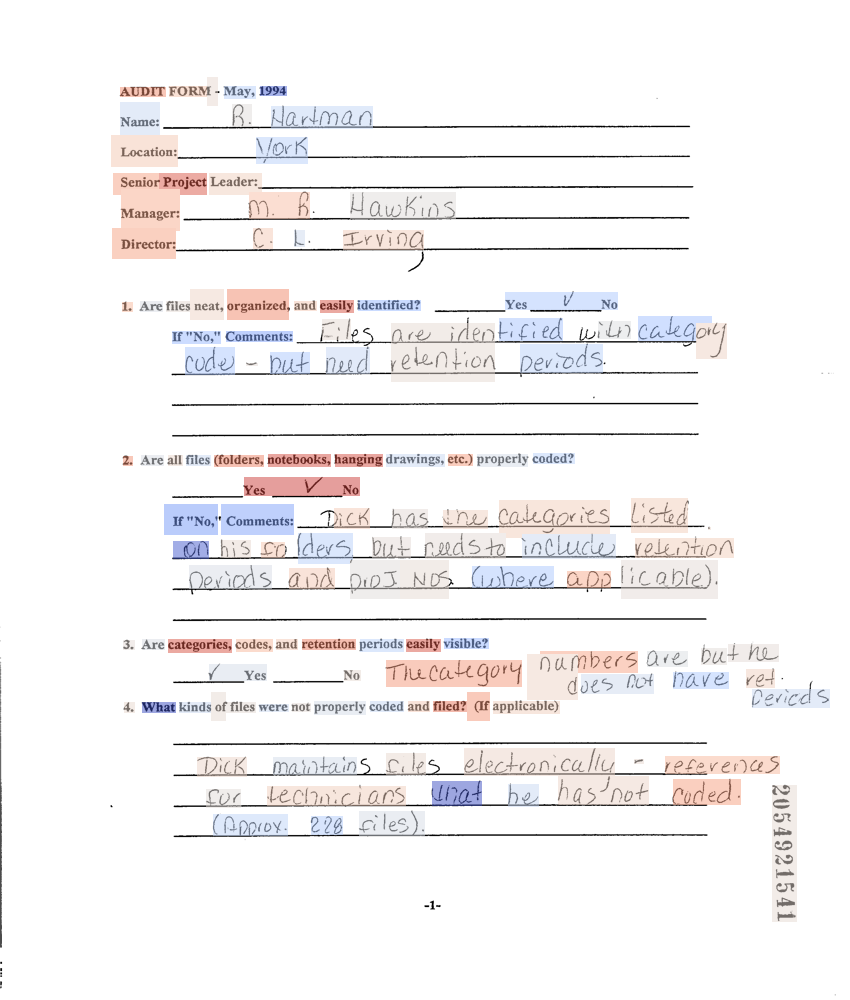

In [43]:
# Pertaining to label 4 (correct, Questionnaire) (idx 0 shap)
layout_explanations_hms = {}
layout_explanations_weights = {}
for key, explanation in shap_layout_explainations.items():
  weights = {tok : float(val) for tok, val in zip(CLASH[0].words, shap_layout_explainations[key].values[:,:,0].flatten())}
  layout_explanations_weights.update({key : weights})
  layout_explanations_hms.update({key : draw_lime_token_heatmap(image = CLASH[0].image, words = CLASH[0].words, boxes = CLASH[0].bboxes, weights=weights, alpha=0.5) })

for key, explanation in lime_layout_explainations.items():
  weights = dict(lime_layout_explainations[key].as_list(label=0))
  clean_weights = {key.replace('=1', ''): value for key, value in weights.items()}
  layout_explanations_weights.update({key : clean_weights})
  layout_explanations_hms.update({key : draw_lime_token_heatmap(image = CLASH[0].image, words = CLASH[0].words, boxes = CLASH[0].bboxes, weights=clean_weights, alpha=0.5) })

# LLMV3 Fidelity
pred_fn_bros_s = FidelityEvaluator(BROS, BROS_encode, mask_token=BROS_t.mask_token)._get_prediction_function(0)
pred_fn_bros_l = FidelityEvaluator(BROS, BROS_encode, mask_token=BROS_t.mask_token)._get_prediction_function(0)
comp_s = calculate_comprehensiveness(pred_fn_bros_s, CLASH[0], layout_explanations_weights['BROS shap'], mask_token=BROS_t.mask_token,  top_k=10, modality='layout')
comp_l = calculate_comprehensiveness(pred_fn_bros_l, CLASH[0], layout_explanations_weights['BROS lime'], mask_token=BROS_t.mask_token,  top_k=5,modality='layout')
suf_s = calculate_sufficiency(pred_fn_bros_s, CLASH[0], layout_explanations_weights['BROS shap'], mask_token=BROS_t.mask_token,  top_k=5,modality='layout')
suf_l = calculate_sufficiency(pred_fn_bros_l, CLASH[0], layout_explanations_weights['BROS lime'], mask_token=BROS_t.mask_token,  top_k=5,modality='layout')

# display_image_grid([layout_explanations_hms['BROS lime'], layout_explanations_hms['BROS shap']],
#                    [f'LLMV3 - Lime w.r.t layout\nComprehensiveness = {comp_l:.3g}, Sufficiency = {suf_l:.3g}', f'LLMV3 - SHAP w.r.t layout\nComprehensiveness = {comp_s:.3g}, Sufficiency = {suf_s:.3g}'],
#                     (1,2),
#                    main_title='Layout LMV3 Correct Prediction w.r.t Layout\n "Questionnaire"')

layout_explanations_hms['BROS shap']
# layout_explanations_hms['BROS shap']

In [38]:
print(shap_layout_explainations.keys())
print(lime_layout_explainations.keys())


dict_keys(['BROS shap', 'LLMV3 shap'])
dict_keys(['BROS lime', 'LLMV3 lime'])
{'BROS lime': <lime.explanation.Explanation object at 0x794e393e5590>, 'LLMV3 lime': <lime.explanation.Explanation object at 0x794e394f5d90>}


In [42]:
shap_layout_fid = {}
lime_layout_fid = {}

# ---------------------------  SHAP  --------------------------------
for key, exp in shap_layout_explainations.items():
    if "LLMV3" in key:                                  # class-4 explanation
        scores   = exp.values[:, :, 4].flatten()        # (#tokens,)
        weights  = {tuple(box): float(s)
                    for box, s in zip(CLASH[0].bboxes, scores)}
        shap_layout_fid[key] = eval(CLASH[0], weights, "layout",
                                    LLMV3, LLMV3_encode,
                                    top_k=5, device=device,
                                    mask_token=LLMV3_proc.tokenizer.mask_token,
                                    target_class_id=4)

    if "BROS" in key:                                   # class-0 explanation
        scores   = exp.values[:, :, 0].flatten()
        weights  = {tuple(box): float(s)
                    for box, s in zip(CLASH[0].bboxes, scores)}
        shap_layout_fid[key] = eval(CLASH[0], weights, "layout",
                                    BROS, BROS_encode,
                                    top_k=5, device=device,
                                    mask_token=BROS_t.mask_token,
                                    target_class_id=0)


for key, exp in lime_layout_explainations.items():
    if "LLMV3" in key:                                  # LIME gives token-idx → w
        token_w = dict(exp.as_map()[4])                 # class-4 map
        bbox_w  = {tuple(CLASH[0].bboxes[i]): w
                   for i, w in token_w.items()
                   if i < len(CLASH[0].bboxes)}
        lime_layout_fid[key] = eval(CLASH[0], bbox_w, "layout",
                                     LLMV3, LLMV3_encode,
                                     top_k=5, device=device,
                                     mask_token=LLMV3_proc.tokenizer.mask_token,
                                     target_class_id=4)

    if "BROS" in key:
        token_w = dict(exp.as_map()[0])                 # class-0 map
        bbox_w  = {tuple(CLASH[0].bboxes[i]): w
                   for i, w in token_w.items()
                   if i < len(CLASH[0].bboxes)}
        lime_layout_fid[key] = eval(CLASH[0], bbox_w, "layout",
                                     BROS, BROS_encode,
                                     top_k=5, device=device,
                                     mask_token=BROS_t.mask_token,
                                     target_class_id=0)
print(lime_layout_fid)
print(shap_layout_fid)

{'BROS lime': {'comprehensiveness': 0.011835992336273193, 'sufficiency': 0.0008881092071533203, 'original_prob': 0.9711531400680542}, 'LLMV3 lime': {'comprehensiveness': 0.46933966875076294, 'sufficiency': -0.00030928850173950195, 'original_prob': 0.9907686114311218}}
{'BROS shap': {'comprehensiveness': 0.018444538116455078, 'sufficiency': 0.0037642717361450195, 'original_prob': 0.9711531400680542}, 'LLMV3 shap': {'comprehensiveness': 0.04255861043930054, 'sufficiency': -0.0037039518356323242, 'original_prob': 0.9907686114311218}}


## Vision

In [12]:
vision_explainers = {
    'LLMV3 lime' : LimeVisionExplainer(LLMV3, LLMV3_encode, label = [4], device=device),
    'LLMV3 shap' : SHAPVisionExplainer(LLMV3, LLMV3_encode, device=device, class_idx=4, mask_value='blur(64,64)')
}

In [57]:
print(vision_explanations['LLMV3 shap'].values.shape)

(1000, 850, 3)


In [13]:
vision_explanations = {key : explainer.explain(CLASH[0], num_samples = 1000) for key, explainer in vision_explainers.items() if 'lime' in key}
vision_explanations.update({key : explainer.explain(CLASH[0], nsamples = 1000) for key, explainer in vision_explainers.items() if 'shap' in key})
# temp = vision_explainers['LLMV3 shap'].explain(CLASH[0], nsamples = 1000, max_batch = 32)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:46, 46.47s/it]               


(850, 1000)

In [49]:
print(vision_explanations['LLMV3 shap'])

.values =
array([[[-1.13166982e-09, -1.13166982e-09, -1.13166982e-09],
        [-1.13166982e-09, -1.13166982e-09, -1.13166982e-09],
        [-1.13166982e-09, -1.13166982e-09, -1.13166982e-09],
        ...,
        [ 1.34234920e-10,  1.34234920e-10,  1.34234920e-10],
        [ 1.34234920e-10,  1.34234920e-10,  1.34234920e-10],
        [ 1.34234920e-10,  1.34234920e-10,  1.34234920e-10]],

       [[-1.13166982e-09, -1.13166982e-09, -1.13166982e-09],
        [-1.13166982e-09, -1.13166982e-09, -1.13166982e-09],
        [-1.13166982e-09, -1.13166982e-09, -1.13166982e-09],
        ...,
        [ 1.34234920e-10,  1.34234920e-10,  1.34234920e-10],
        [ 1.34234920e-10,  1.34234920e-10,  1.34234920e-10],
        [ 1.34234920e-10,  1.34234920e-10,  1.34234920e-10]],

       [[-1.13166982e-09, -1.13166982e-09, -1.13166982e-09],
        [-1.13166982e-09, -1.13166982e-09, -1.13166982e-09],
        [-1.13166982e-09, -1.13166982e-09, -1.13166982e-09],
        ...,
        [ 1.34234920e-10,  1.342

In [59]:
import numpy as np
from Eval.eval_suite_updated import evaluate_sample
from skimage.segmentation import slic
from PIL import Image

# Lime
lime_segs = vision_explanations['LLMV3 lime'].segments
seg_weights = {int(sid): float(w) for sid, w in vision_explanations['LLMV3 lime'].local_exp[4]}

metrics_lime = evaluate_sample(CLASH[0], seg_weights, 'vision',
                               LLMV3, LLMV3_encode,
                               top_k = 10,
                               device = device,
                               target_class_id = 4,
                               segments = lime_segs)

print("lime:", metrics_lime)

# SHAP

shap_vals = vision_explanations['LLMV3 shap'].values   # (H,W,3) float
abs_map   = np.abs(shap_vals).sum(-1)                    # (H,W)

# we can **reuse** “segments_L”, or create a fresh SLIC segmentation;
# here we reuse for a like-for-like comparison:
segments_S = lime_segs

weights_S = {int(sid): float(abs_map[segments_S == sid].mean())
             for sid in np.unique(segments_S)}

metrics_shap = evaluate_sample(CLASH[0], weights_S, "vision",
                               LLMV3, LLMV3_encode,
                               top_k           = 10,
                               device          = device,
                               target_class_id = 4,
                               segments        = segments_S)

print("SHAP – vision:", metrics_shap)


lime: {'comprehensiveness': 0.0016532540321350098, 'sufficiency': -0.004305839538574219, 'original_prob': 0.9907686114311218}
SHAP – vision: {'comprehensiveness': -0.0020790696144104004, 'sufficiency': -0.00198519229888916, 'original_prob': 0.9907686114311218}


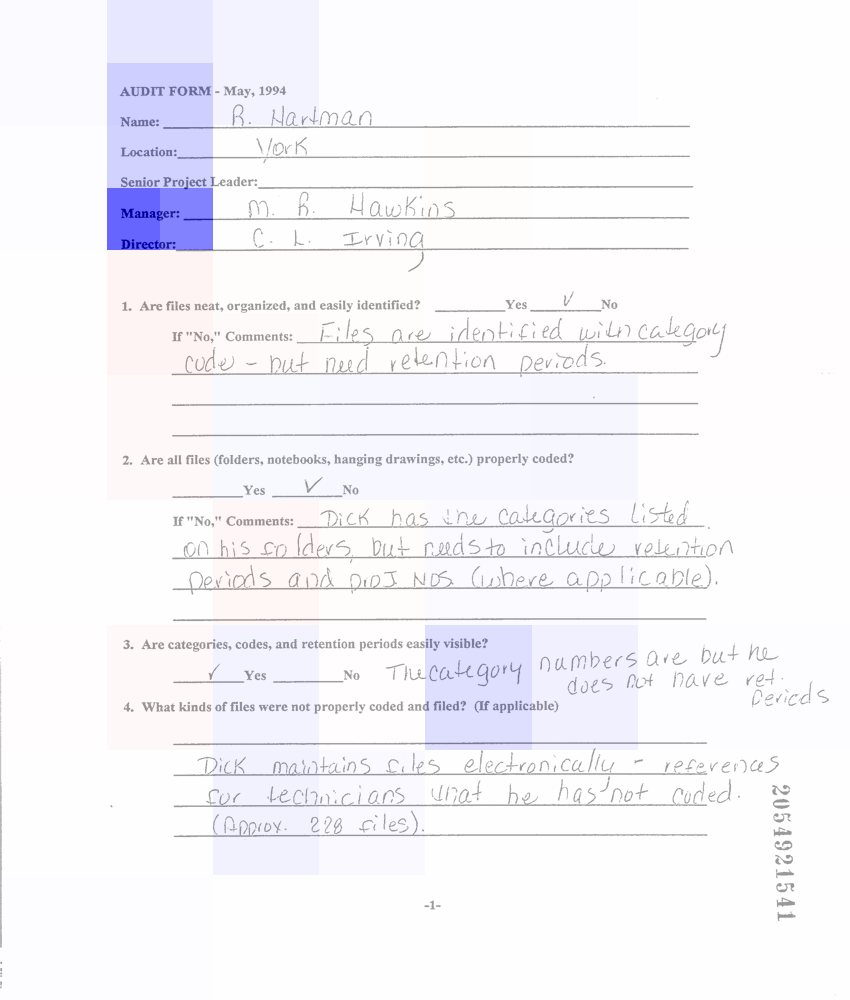

In [38]:
def shap_overlay(exp, alpha=0.6, cmap="bwr"):
    vals  = exp.values          # (H,W) or (H,W,3)
    img   = exp.data.astype(np.uint8)   # (H,W,3)

    if vals.ndim == 3:                   # SHAP gave per-channel values
        vals = vals.mean(2)              # collapse to one heat-map

    vmax  = np.abs(vals).max() + 1e-12
    norm  = (vals + vmax) / (2 * vmax)   # 0…1
    rgb   = plt.get_cmap(cmap)(norm)[..., :3] * 255  # (H,W,3) uint8
    blend = (img*(1-alpha) + rgb*alpha).astype(np.uint8)
    return Image.fromarray(blend)

shap_overlay(vision_explanations['LLMV3 shap'], alpha=0.6)


/tmp/ipython-input-4256015143.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color  = np.array(cm.get_cmap(cmap)((w+vmax)/(2*vmax))[:3]) * 255


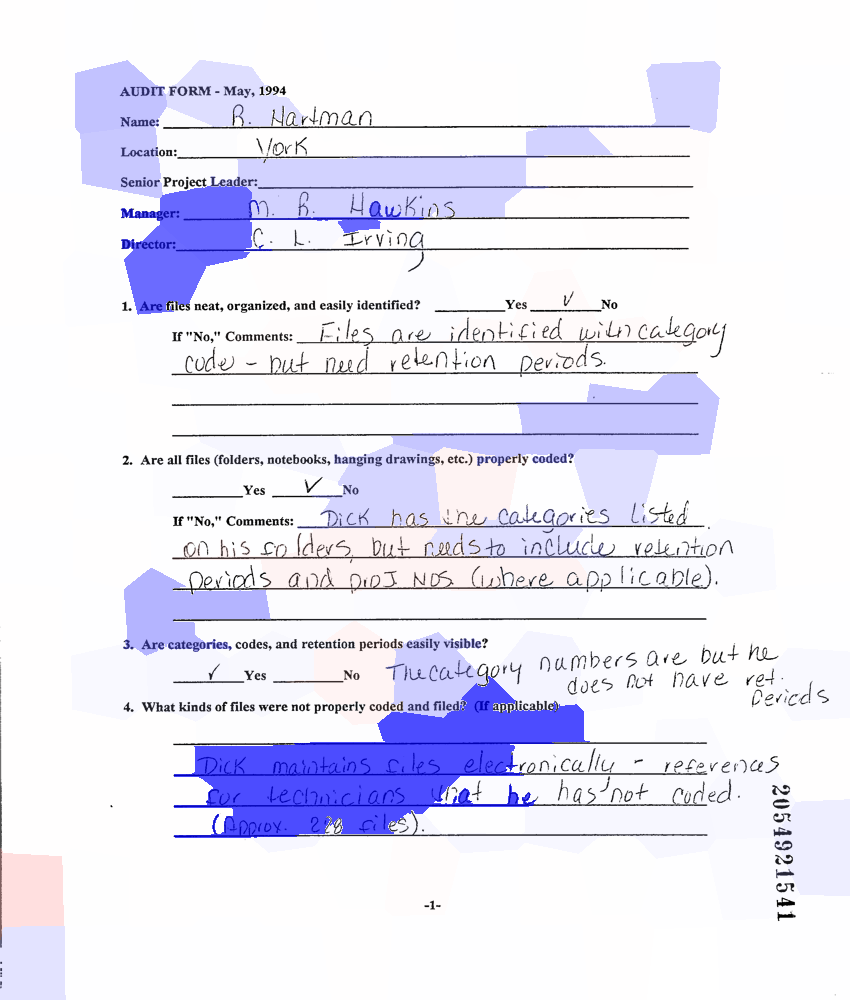

In [40]:
import numpy as np, matplotlib.pyplot as plt, matplotlib.cm as cm
from PIL import Image
from skimage.segmentation import slic

def lime_heatmap(expl, class_idx=4, alpha_max=0.6, cmap="bwr"):
    img     = expl.image.astype(float)                          # (H,W,3)
    segs    = expl.segments                                     # (H,W) labels
    weights = dict(expl.local_exp[class_idx])                   # {seg: w}
    vmax    = max(abs(w) for w in weights.values()) + 1e-12     # normaliser

    overlay = img.copy()
    for seg_id, w in weights.items():
        mask   = segs == seg_id                                 # (H,W) bool
        color  = np.array(cm.get_cmap(cmap)((w+vmax)/(2*vmax))[:3]) * 255
        alpha  = alpha_max * abs(w) / vmax                      # 0 → alpha_max
        overlay[mask] = overlay[mask]*(1-alpha) + color*alpha

    return Image.fromarray(overlay.astype(np.uint8))

# ---------------- example ----------------------------------------------
expl  = vision_explanations['LLMV3 lime']             # your LimeImageExplainer output
hm    = lime_heatmap(expl, class_idx=4, alpha_max=0.7)
hm

9.3340874e-05 -0.00065129995
-1.4066696e-05 -0.00070625544


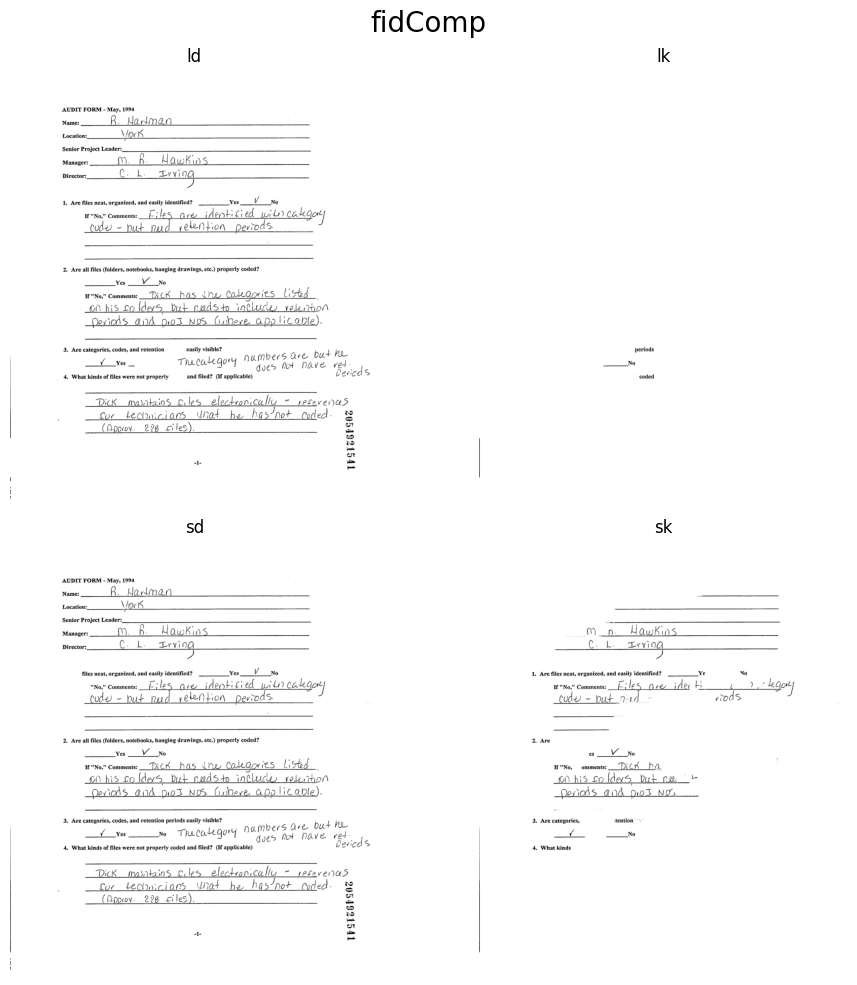

In [ ]:
pred_f_l = vision_explainers['LLMV3 lime']._batched_predict
pred_f_s = vision_explainers['LLMV3 shap']._batched_predict
lime_drop, im1   = lime_comprehensiveness(pred_f_l, CLASH[0], vision_explanations['LLMV3 lime'],4, 2 )
lime_keep, im2   = lime_sufficiency(pred_f_l, CLASH[0], vision_explanations['LLMV3 lime'],4,2)
print(lime_drop, lime_keep)
# SHAP
shap_drop, im3   = shap_comprehensiveness(pred_f_l, CLASH[0], temp, 1)
shap_keep, im4   = shap_sufficiency(pred_f_l, CLASH[0], temp,50)
print(shap_drop, shap_keep)
display_image_grid([im1,im2,im3,im4], titles=['ld', 'lk', 'sd', 'sk'], grid_size=(2,2),main_title='fidComp')

In [ ]:
def _predict_prob(predict_fn, sample):
    logits = predict_fn([sample])[0]
    if logits.ndim == 0:
        return 1 / (1 + np.exp(-logits))
    cls = np.argmax(logits)
    probs = 1 / (1 + np.exp(-logits))
    return probs[cls]


def _mask_image(img, mask, hide=(255, 255, 255)):
    out = img.copy()
    out[mask] = hide
    return out


def _doc_from_img(img_np, t):
    return DocSample(
        image=Image.fromarray(img_np),
        words=t.words,
        bboxes=t.bboxes,
        ner_tags=t.ner_tags,
        label=t.label,
    )


# -------- LIME -------------------------------------------------------------
def _topk_lime_segments(weights: dict, k: int):
    # keep only positive weights
    pos = {sid: w for sid, w in weights.items() if w > 0}
    if not pos:
        return []
    return sorted(pos, key=pos.get, reverse=True)[:k]


def lime_comprehensiveness(predict, sample, exp, class_idx, k=5):
    w = dict(exp.local_exp[class_idx])
    top = _topk_lime_segments(w, k)

    seg = exp.segments
    mask = np.isin(seg, top)

    img = np.asarray(sample.image.convert("RGB"))
    masked = _mask_image(img, mask)
    pert = _doc_from_img(masked, sample)

    d = _predict_prob(predict, sample) - _predict_prob(predict, pert)
    return d, Image.fromarray(masked)


def lime_sufficiency(predict, sample, exp, class_idx, k=5):
    w = dict(exp.local_exp[class_idx])
    top = _topk_lime_segments(w, k)

    seg = exp.segments
    mask = ~np.isin(seg, top)

    img = np.asarray(sample.image.convert("RGB"))
    masked = _mask_image(img, mask)
    pert = _doc_from_img(masked, sample)

    d = _predict_prob(predict, sample) - _predict_prob(predict, pert)
    return d, Image.fromarray(masked)


# -------- SHAP -------------------------------------------------------------
def _topk_shap_segments(vals, img_np, k,
                        n_segments=150, compactness=10, sigma=1):
    segs = slic(img_np, n_segments=n_segments,
                compactness=compactness, sigma=sigma, start_label=0)
    means = {sid: vals[segs == sid].mean() for sid in np.unique(segs)}
    pos = {sid: m for sid, m in means.items() if m > 0}
    if not pos:
        return np.zeros_like(vals, bool)  # no positive region
    top = sorted(pos, key=pos.get, reverse=True)[:k]
    return np.isin(segs, top)


def shap_comprehensiveness(predict, sample, exp, k=10, slic_kw=None):
    vals = exp.values.mean(2) if exp.values.ndim == 3 else exp.values
    img = np.asarray(sample.image.convert("RGB"))
    mask = _topk_shap_segments(vals, img, k, **(slic_kw or {}))

    masked = _mask_image(img, mask)
    pert = _doc_from_img(masked, sample)

    d = _predict_prob(predict, sample) - _predict_prob(predict, pert)
    return d, Image.fromarray(masked)


def shap_sufficiency(predict, sample, exp, k=10, slic_kw=None):
    vals = exp.values.mean(2) if exp.values.ndim == 3 else exp.values
    img = np.asarray(sample.image.convert("RGB"))
    keep = _topk_shap_segments(vals, img, k, **(slic_kw or {}))
    mask = ~keep

    masked = _mask_image(img, mask)
    pert = _doc_from_img(masked, sample)

    d = _predict_prob(predict, sample) - _predict_prob(predict, pert)
    return d, Image.fromarray(masked)

## DUMP

### Vision

In [ ]:
vision_explainer = LimeVisionExplainer(
    LLMV3,
    LLMV3_encode,
    batch_size=4,
    label = 4
)

vision_vals = vision_explainer.explain(CLASH[0], num_samples=1000, num_features=200)

  0%|          | 0/1000 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

[LIME] - VISION:   0%|          | 0/1 [00:00<?, ?it/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-236-2457376288.py", line 8, in <cell line: 0>
    vision_vals = vision_explainer.explain(CLASH[0], num_samples=1000, num_features=200)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/Interpretability-for-VRDU-models/Classification_Explain/lime.py", line 191, in explain
    return explainer.explain_instance(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/lime/lime_image.py", line 198, in explain_instance
    data, labels = self.data_labels(image, fudged_image, segments,
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/lime/lime_image.py", line None, in data_labels
KeyboardInterrupt

During handling of the ab

In [ ]:
print("Explanation score (R²):", vision_vals.score)

In [ ]:
segment_weights = dict(vision_vals.local_exp[2])

# Create weight map
segments = vision_vals.segments
weight_map = np.zeros_like(segments, dtype=float)
for seg_id, weight in segment_weights.items():
    weight_map[segments == seg_id] = weight

# Define overlay function
def lime_weight_to_overlay(image_np, weight_map, alpha=0.4):
    max_weight = np.max(np.abs(weight_map))
    if max_weight == 0:
        max_weight = 1
    normalized_weights = weight_map / max_weight
    r = np.where(normalized_weights > 0, 255,
                 np.where(normalized_weights < 0, 255 * (1 + normalized_weights), 255))
    g = np.where(normalized_weights > 0, 255 * (1 - normalized_weights),
                 np.where(normalized_weights < 0, 255 * (1 + normalized_weights), 255))
    b = np.where(normalized_weights > 0, 255 * (1 - normalized_weights),
                 np.where(normalized_weights < 0, 255, 255))
    color_map = np.stack([r, g, b], axis=-1).astype(np.uint8)
    overlay = ((1 - alpha) * image_np + alpha * color_map).clip(0, 255).astype(np.uint8)
    return overlay

# Apply overlay
img_np = vision_vals.image
heat_np = lime_weight_to_overlay(img_np, weight_map, alpha=0.4)

# Display
Image.fromarray(heat_np)

In [ ]:
from PIL import Image

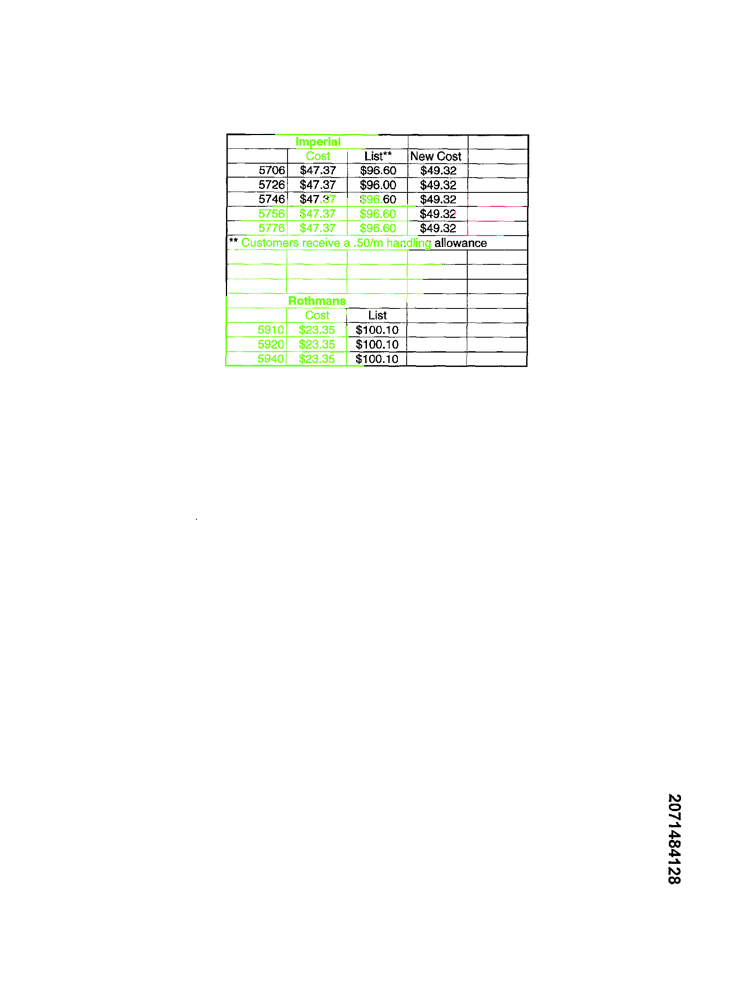

In [ ]:
img_np, mask = vision_vals.get_image_and_mask(
    label = 2,
    positive_only=False,   # include negative weights too
    num_features=30,
    hide_rest=False
)

heat_np = lime_mask_to_overlay(img_np, mask, alpha=0.40)
Image.fromarray(heat_np)

In [ ]:
print("Explanation score (R²):", vision_vals.score)
for word, weight in vision_vals:
  print(f"{word:10s} -> {weight:+.10f}")

Explanation score (R²): 0.4999955177896892


TypeError: 'ImageExplanation' object is not iterable

In [ ]:
text_explainer = LimeTextExplainer(
    LLMV3,
    LLMV3_encode,
    mask_token = LLMV3_proc.tokenizer.mask_token,
    batch_size = 2,
    kernel_width_factor = 0.75,
    labels = [4]
)

In [ ]:
text_vals = text_explainer.explain(AGREE[0], align_boxes=True, num_samples=2000, num_features=30)

Begging EXPLAINER
Begging EXPLAIN_INSTANCE
MADE PREDICT


[LIME] - Text: 100%|██████████| 1000/1000 [01:07<00:00, 14.85it/s]


In [ ]:
print("Explanation score (R²):", text_vals.score)
for word, weight in text_vals.as_list(label=4):
  print(f"{word:10s} -> {weight:+.10f}")

Explanation score (R²): 0.5400323868604897
TESTING=1  -> +0.3205282359
PERMIT=1   -> -0.2453773293
CIRCLE=1   -> +0.1232844989
09/14/00=1 -> -0.1213931989
7592605030=1 -> -0.1209888985
LEGAL=1    -> -0.1035435944
CHANGED=1  -> -0.0964325781
Date=1     -> -0.0920091476
FAX=1      -> -0.0919534823
phrases=1  -> +0.0746460957
VIRGINA=1  -> -0.0709158064
Ballot=1   -> +0.0688230427
01516960=1 -> -0.0609925024
CONSUMER=1 -> +0.0608734673
77=1       -> +0.0560616357
CHANGE=1   -> -0.0554682898
18042744780=1 -> -0.0534544893
each=1     -> +0.0481802885
Q=1        -> +0.0478539118
22014=1    -> -0.0478075509
P.O.=1     -> +0.0469367506
Due=1      -> -0.0458769306
PRODUCT=1  -> -0.0441783156
listed=1   -> +0.0435822464
the=1      -> +0.0428622151
OR=1       -> +0.0402991049
11:22=1    -> -0.0399912225
JOHN=1     -> -0.0357928618
LONG=1     -> +0.0328746740
a=1        -> +0.0315960852


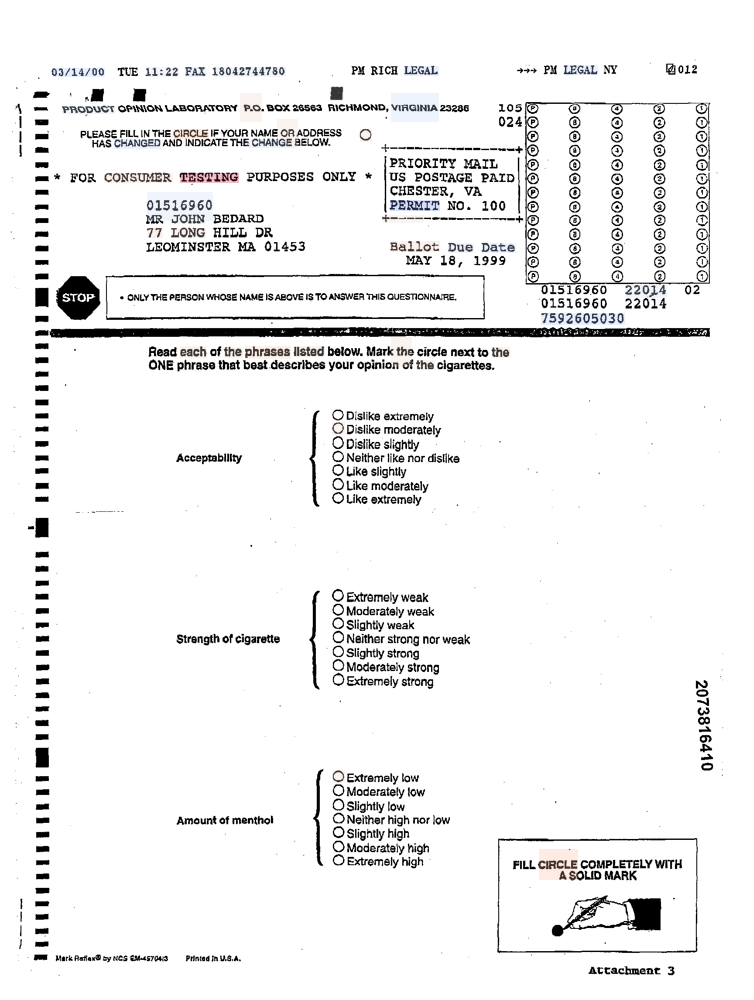

In [ ]:
from vrdu_utils.utils import draw_lime_token_heatmap
import re
weights = {}
for token, w in text_vals.as_list(label=4):
    clean = re.sub(r"=\d+$", "", token)     # drop '=number' suffix
    weights[clean] = weights.get(clean, 0.0) + w

draw_lime_token_heatmap(image = AGREE[0].image, words = AGREE[0].words, boxes = AGREE[0].bboxes, weights = weights, alpha = 0.25)

In [ ]:
fe_text = FidelityEvaluator(
    model = LLMV3,
    encode_fn = LLMV3_encode,
    device = device,
    mask_token = LLMV3_proc.tokenizer.mask_token
)

In [ ]:
len(AGREE[0].words)

41

In [ ]:
top20 = sorted(weights, key=weights.get, reverse=True)[: int(len(weights)*0.2)]

print("LIME feature strings:", top20[:10])
print("First 20 words in sample:", AGREE[0].words[:20])

# quick overlap check
print("Overlap size:",
      len({f.split('=')[0] for f in top20}.intersection(AGREE[0].words)))

LIME feature strings: ['Cost', 'handling', '$49.82', '$49.32', '$23.35,', '$23.95']
First 20 words in sample: ['Imperial', 'Tact]', 'L', 'Cost', '|', '5706|_$47.37', '$49.32', '|', '|', '5726|', '$47.37', '$49.82', '|', '|', '—5746|', '$47.37', '$49.32', '_|', '5756|', '$47.37']
Overlap size: 6


In [ ]:
orig = fe_text._get_prediction_function(AGREE[0].label)(AGREE[0])
pert = fe_text._get_prediction_function(AGREE[0].label)(
            DocSample(image=AGREE[0].image, words=["[UNK]"]*len(AGREE[0].words),
                      bboxes=AGREE[0].bboxes, ner_tags=AGREE[0].ner_tags, label=AGREE[0].label))
print(f"p_orig  = {orig:.6f}")
print(f"p_allUNK= {pert:.6f}")

p_orig  = 0.999919
p_allUNK= 0.000055


In [ ]:
scores = fe_text.evaluate(
    sample          = AGREE[0],
    explanation     = weights,
    top_k_fraction  = 0.2,          # use 20 % of the most important tokens
)
print(scores)
# {'$49.82', '$23.35', '$47.37', '$49.92,', '$23.35,', 'Cost', 'Imperial', '$49.32', 'handling', '$23.95'}
# {'$49.82', '$23.35', '$47.37', '$23.35,', 'Cost', 'Imperial', '$49.32', 'handling', '$23.95'}

dict_items([('TESTING', 0.3205282359193263), ('PERMIT', -0.24537732930020018), ('CIRCLE', 0.12328449890107587), ('09/14/00', -0.1213931988633826), ('7592605030', -0.12098889847925068), ('LEGAL', -0.10354359444888225), ('CHANGED', -0.09643257809098012), ('Date', -0.09200914757371348), ('FAX', -0.09195348232135804), ('phrases', 0.07464609571952292), ('VIRGINA', -0.07091580644369469), ('Ballot', 0.0688230427130549), ('01516960', -0.060992502389710615), ('CONSUMER', 0.060873467319759254), ('77', 0.056061635661395395), ('CHANGE', -0.055468289752155286), ('18042744780', -0.05345448929443866), ('each', 0.0481802885151693), ('Q', 0.04785391175292557), ('22014', -0.04780755093980096), ('P.O.', 0.04693675062595101), ('Due', -0.045876930620211864), ('PRODUCT', -0.04417831562019167), ('listed', 0.043582246366153064), ('the', 0.042862215108855135), ('OR', 0.040299104889327954), ('11:22', -0.03999122252246325), ('JOHN', -0.03579286181732051), ('LONG', 0.032874674032047205), ('a', 0.03159608518628525